We used the Coronavirus Tweets Dataset from Kaggle
https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification/data

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

We imported the Dataset here

In [2]:
dataset = pd.read_csv('Corona_NLP_train.csv', encoding='latin1')

A basic text preprocessing by removing punctuations, numbers. The data has also been cleaned by removing characters including and after "https" in the text

In [3]:
import re 
texts=[]
for i in range(0,len(dataset)):
  text = re.sub('[^a-zA-Z]' , ' ', dataset['OriginalTweet'][i])
  text = text.lower()
  text = text.split()
  x = len(text) if text.count('https') ==0  else text.index('https') 
  text = text[: x ]
  text = [t for t in text if not t=='https']
  text = ' '.join(text)
  texts.append(text)

Output of the size of the dataset.

In [4]:
print(len(texts))

41157


Training the word2vec model 

In [5]:
from gensim.models import Word2Vec

In [6]:
sentences = [line.split() for line in texts]

w2v = Word2Vec(sentences, vector_size=100, window=5, workers=4, epochs=10, min_count=5)

In [7]:
print(sentences[20:25])

[['with', 'nations', 'inficted', 'with', 'covid', 'the', 'world', 'must', 'not', 'play', 'fair', 'with', 'china', 'goverments', 'must', 'demand', 'china', 'adopts', 'new', 'guilde', 'lines', 'on', 'food', 'safty', 'the', 'chinese', 'goverment', 'is', 'guilty', 'of', 'being', 'irosponcible', 'with', 'life', 'on', 'a', 'global', 'scale'], [], ['we', 'have', 'amazing', 'cheap', 'deals', 'for', 'the', 'covid', 'going', 'on', 'to', 'help', 'you', 'trials', 'monthly', 'yearly', 'and', 'resonable', 'prices', 'subscriptions', 'just', 'dm', 'us', 'bestiptv', 'iptv', 'service', 'iptv', 'iptvdeals', 'cheap', 'iptv', 'football', 'hd', 'movies', 'adult', 'cinema', 'hotmovies', 'iptvnew', 'iptv', 'adult'], ['we', 'have', 'amazing', 'cheap', 'deals', 'for', 'the', 'covid', 'going', 'on', 'to', 'help', 'you', 'trials', 'monthly', 'yearly', 'and', 'resonable', 'prices', 'subscriptions', 'just', 'dm', 'us', 'bestiptv', 'iptv', 'service', 'iptv', 'iptvdeals', 'cheap', 'iptv', 'football', 'hd', 'movies', 

Working with word2vec

In [8]:
words = list(w2v.wv.index_to_key)

In [9]:
print(words)

['the', 'to', 'and', 'of', 'covid', 'a', 'in', 'coronavirus', 'for', 'is', 'are', 'i', 'you', 'on', 's', 'this', 'prices', 'at', 'it', 'food', 'supermarket', 'we', 'store', 'that', 'with', 'grocery', 'have', 'as', 'be', 'people', 't', 'from', 'amp', 'all', 'can', 'consumer', 'your', 'not', 'will', 'they', 'my', 'our', 'up', 'out', 'has', 'or', 'by', 'more', 'but', 'shopping', 'if', 'online', 'how', 'their', 'during', 'pandemic', 'so', 'now', 'no', 'what', 'get', 'about', 'who', 'need', 'workers', 'panic', 'just', 'there', 'us', 'do', 'like', 'time', 'sanitizer', 'home', 'was', 'an', 'demand', 'go', 'when', 'some', 'help', 'hand', 'stock', 'don', 're', 'going', 'one', 'm', 'me', 'here', 'due', 'buying', 'been', 'oil', 'new', 'crisis', 'please', 'work', 'them', 'after', 'other', 'toilet', 'because', 'only', 'these', 'should', 'toiletpaper', 'than', 'paper', 'today', 'over', 'stay', 'local', 'retail', 'keep', 'buy', 'stores', 'many', 'shelves', 'still', 'being', 'make', 'delivery', 'those

In [10]:
print(len(words))

10630


Finding the embedding of a given word can be useful when we’re trying to represent sentences as a collection of word embeddings, like when we’re trying to make a weight matrix for the embedding layer of a network.

In [11]:
print( w2v.wv['computer'] )

[ 0.23704134 -0.03675461 -0.0160556   0.08194015 -0.0296799  -0.19893816
 -0.26902935  0.17767167  0.02941804  0.09442382 -0.21373677 -0.01778443
  0.03848917  0.10546376  0.38664335  0.00536155  0.19444849 -0.2789666
  0.12774037 -0.31611857  0.506155    0.19963013  0.0293524  -0.16061482
 -0.07811683  0.01566653 -0.31330264 -0.07203219  0.15407927 -0.07619552
  0.10603983  0.13504815  0.1851947  -0.28411776 -0.01971612  0.29357132
 -0.33227244 -0.13258761 -0.1120256  -0.17461479 -0.305999   -0.00317245
 -0.05927814  0.14539292  0.1366754  -0.05735336  0.06754382  0.0346095
 -0.08007257  0.30814502  0.16089275  0.05476571 -0.04217755 -0.18360998
 -0.06836624 -0.13123553 -0.10742649  0.21567048 -0.11615819  0.12433003
 -0.12268902  0.05233797 -0.06102576  0.03868957 -0.37812936  0.14071615
  0.01021558  0.33263627 -0.10435496  0.3409997  -0.07821856 -0.10572834
  0.3708057  -0.15856348  0.16336972  0.16957131 -0.26377216  0.05601282
 -0.1656158   0.08396372  0.16437343 -0.09253319 -0.2

In [12]:
w2v.wv.similarity('vladimir', 'putin')

0.8560308

In [13]:
w2v.wv.similarity('vladimir', 'modi')

0.61593294

In [14]:
print(w2v.wv.most_similar('pay'))

[('paid', 0.6731659173965454), ('paying', 0.6405247449874878), ('raise', 0.6173566579818726), ('bills', 0.607968807220459), ('wages', 0.5977242588996887), ('cancel', 0.5915102362632751), ('rent', 0.590889573097229), ('wage', 0.5613786578178406), ('hazard', 0.5419013500213623), ('receive', 0.541775107383728)]


In [15]:
print(w2v.wv.most_similar('covid'))

[('coronavirus', 0.6123892664909363), ('corona', 0.5237143039703369), ('virus', 0.5219135880470276), ('coronavirusoutbreakindia', 0.47419342398643494), ('convid', 0.4474540948867798), ('coronacrisis', 0.4460386633872986), ('flattenthecurve', 0.4390365183353424), ('coronavirusindia', 0.43842318654060364), ('coronavirusoutbreak', 0.4378567934036255), ('disease', 0.4376722574234009)]


In [16]:
print(w2v.wv.most_similar('india'))

[('nigeria', 0.755431592464447), ('pakistan', 0.7396084666252136), ('odisha', 0.6658060550689697), ('ksa', 0.6517503261566162), ('iran', 0.6492250561714172), ('irvpaswan', 0.6478331089019775), ('kenya', 0.6469272971153259), ('finminindia', 0.6396148800849915), ('amitshah', 0.6255121231079102), ('drharshvardhan', 0.6219511032104492)]


In [ ]:
print(w2v.wv.most_similar(positive=['russian', 'russia'], negative=['arab']))

[('saudi', 0.7738462686538696), ('arabia', 0.762148380279541), ('putin', 0.7079677581787109), ('opec', 0.7018343210220337), ('trump', 0.6908523440361023), ('iran', 0.6548835039138794), ('oil', 0.6101381778717041), ('output', 0.6048676371574402), ('agreed', 0.6030093431472778), ('saudis', 0.5871351957321167)]


In [18]:
w2v.wv.doesnt_match(['grocery', 'covid', 'coronavirus'])

'grocery'

In [19]:
# Define 10 pairs of words from your dataset (make sure they likely exist in vocabulary)
word_pairs = [
    ('covid', 'virus'),
    ('doctor', 'hospital'),
    ('pay', 'wages'),
    ('bills', 'rent'),
    ('coronavirus', 'disease'),
    ('saudiarabia', 'pakistan'),
    ('paid', 'raise'),
    ('modi', 'india'),
    ('charge', 'paying'),
    ('russia', 'russian')
]

In [20]:
# Calculate and print similarity for each pair
similarities = []

print("Cosine Similarities between word pairs:\n")
for w1, w2 in word_pairs:
    if w1 in w2v.wv and w2 in w2v.wv:
        sim = w2v.wv.similarity(w1, w2)
        similarities.append(((w1, w2), sim))
        print(f"Similarity({w1}, {w2}) = {sim:.4f}")
    else:
        print(f"❌ One or both of the words '{w1}', '{w2}' are not in the vocabulary.")

# Find and print the most similar pair
if similarities:
    most_similar_pair = max(similarities, key=lambda x: x[1])
    print(f"\n✅ Most similar pair: {most_similar_pair[0]} with similarity = {most_similar_pair[1]:.4f}")


Cosine Similarities between word pairs:

Similarity(covid, virus) = 0.5219
Similarity(doctor, hospital) = 0.7250
Similarity(pay, wages) = 0.5977
Similarity(bills, rent) = 0.8260
Similarity(coronavirus, disease) = 0.3722
Similarity(saudiarabia, pakistan) = 0.6473
Similarity(paid, raise) = 0.3576
Similarity(modi, india) = 0.5132
Similarity(charge, paying) = 0.4968
Similarity(russia, russian) = 0.7425

✅ Most similar pair: ('bills', 'rent') with similarity = 0.8260


Visualising word vectors

In [21]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(model.wv.index_to_key, sample)
        else:
            words = model.wv.index_to_key
        
    word_vectors = np.array([model.wv[w] for w in words if w in model.wv])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)
    plt.show()

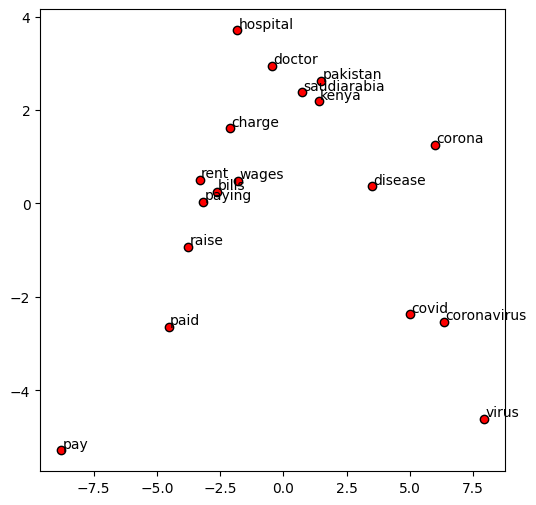

In [22]:
display_pca_scatterplot(w2v,['coronavirus', 'covid', 'virus', 'corona','disease', 'saudiarabia',  'doctor', 'hospital', 'pakistan', 'kenya',
                             'pay', 'paying', 'paid', 'wages', 'raise', 'bills', 'rent', 'charge']  )

Exporting pre trained embeddings + Saving/Loading our model

In [23]:
import gensim.downloader
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [24]:
google_news = gensim.downloader.load('word2vec-google-news-300')
google_news.most_similar('twitter')

[('Twitter', 0.8908904194831848),
 ('Twitter.com', 0.7536780834197998),
 ('tweet', 0.7431626319885254),
 ('tweeting', 0.7161932587623596),
 ('tweeted', 0.7137226462364197),
 ('facebook', 0.6988551616668701),
 ('tweets', 0.6974530816078186),
 ('Tweeted', 0.6950210928916931),
 ('Tweet', 0.6875007152557373),
 ('Tweeting', 0.6845167279243469)]

In [25]:
w2v.save("word2vec.model")

In [26]:
model = Word2Vec.load("word2vec.model")
model.train([["hello", "world"]], total_examples=1, epochs=1)

(2, 2)